In [3]:
#Importing all libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
hotel_df = pd.read_csv("data/hotel_reservations.csv")
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
# Checking the data type for columns
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# checking missing values
hotel_df.isna().sum()
#hotel_df['no_of_special_requests'].value_counts()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
hotel_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
# Checking the class balance for objects
print(hotel_df['booking_status'].value_counts(),"\n")
print(hotel_df['type_of_meal_plan'].value_counts(normalize=True),"\n")
print(hotel_df['room_type_reserved'].value_counts(normalize=True),"\n")
print(hotel_df['market_segment_type'].value_counts(normalize=True), "\n")
print(hotel_df['arrival_month'].value_counts(), "\n")
print(hotel_df['required_car_parking_space'].value_counts(), "\n")
print(hotel_df['repeated_guest'].value_counts(), "\n")
print(hotel_df['no_of_special_requests'].value_counts(normalize=True))

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64 

type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: proportion, dtype: float64 

room_type_reserved
Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: proportion, dtype: float64 

market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64 

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64 

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64 

repeated_guest
0    35345
1      930
Name: count, dtype: int64 

no_of_special_requests
0    0.545196


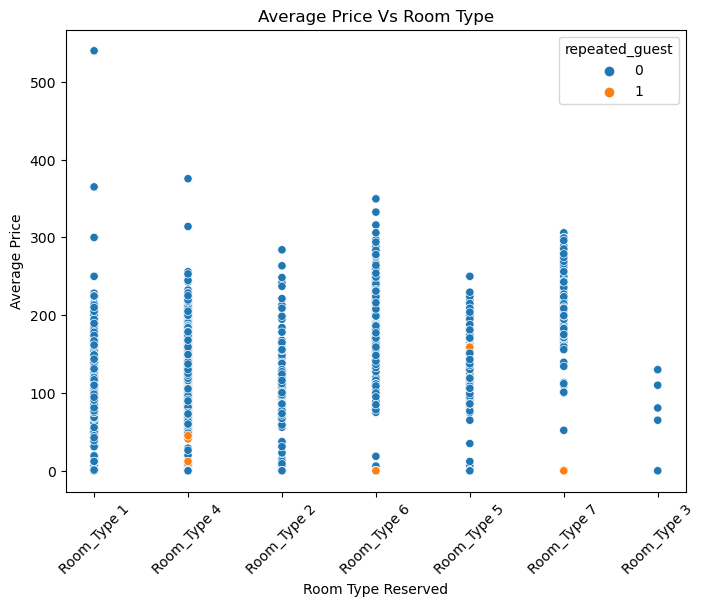

In [9]:
# Visualizing relationship between room type and average cost to check what is roomtype1, roomtype2...

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'room_type_reserved', y = 'avg_price_per_room', data = hotel_df, hue = 'repeated_guest')
plt.xlabel('Room Type Reserved')
plt.xticks(rotation = 45)
plt.ylabel('Average Price')
plt.title("Average Price Vs Room Type")
plt.show()

In [10]:
# Checking correlation factor with booking_status, changing booking from categorical to numerical
hotel_numeric= hotel_df[['booking_status','no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']]
hotel_numeric.loc[:,'booking_status'] = hotel_numeric['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})
hotel_numeric

,booking_status,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_previous_cancellations,no_of_previous_bookings_not_canceled
0,0,0,1,2,224,65.00,0,0
1,0,0,2,3,5,106.68,0,0
2,1,0,2,1,1,60.00,0,0
3,1,0,0,2,211,100.00,0,0
4,1,0,1,1,48,94.50,0,0
...,...,...,...,...,...,...,...,...
36270,0,0,2,6,85,167.80,0,0
36271,1,0,1,3,228,90.95,0,0
36272,0,0,2,6,148,98.39,0,0
36273,1,0,0,3,63,94.50,0,0


<Axes: >

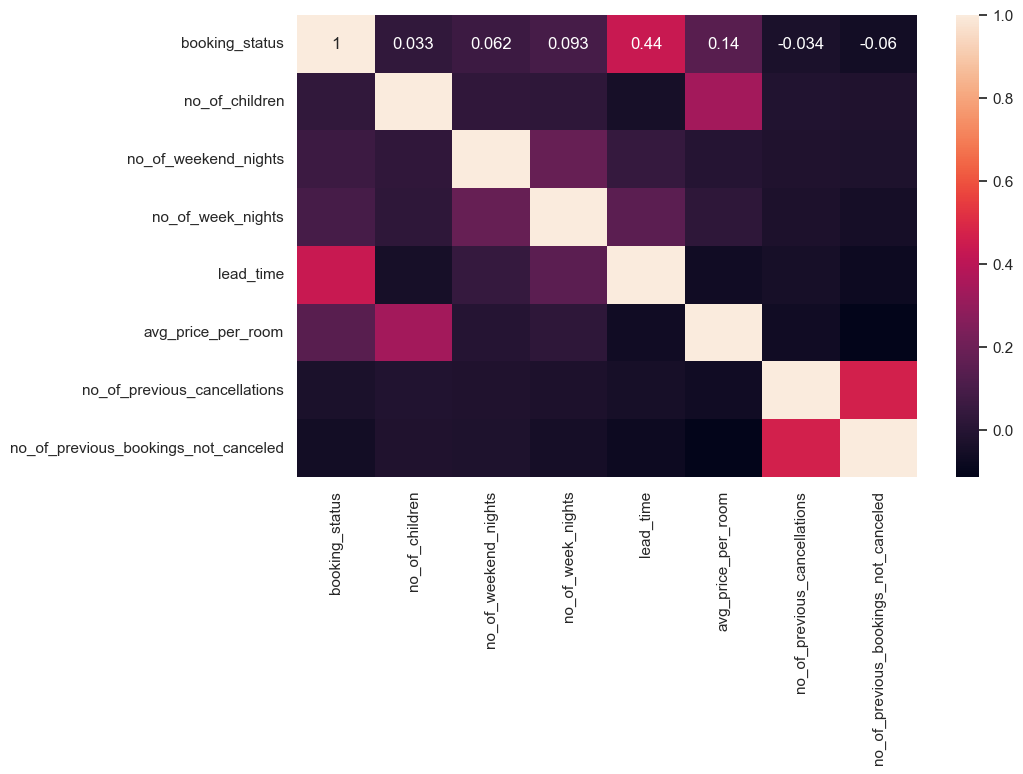

In [11]:
sns.set(rc={'figure.figsize':(10,6)})

# Use the .heatmap function to depict the relationships visually!
sns.heatmap(hotel_numeric.corr(),annot=True)

In [12]:
hotel_numeric.corr()['booking_status'].map(abs).sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.438538
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
no_of_children                          0.033078
Name: booking_status, dtype: float64

### 2. Data Cleaning:

Regarding columns arrival_month, arrival_date and arrival_month. Concatenating all columns to date column 'arrival_date' to use with other columns such as lead_time. 

In [13]:
hotel1_df = hotel_df.copy()
hotel1_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [14]:

hotel1_df['arrival_day'] = hotel1_df['arrival_year'].astype(str) + '-' + hotel1_df['arrival_month'].astype(str) + '-' + hotel1_df['arrival_date'].astype(str)
hotel1_df.loc[:, 'arrival_day'] = pd.to_datetime(hotel1_df['arrival_day'], format='%Y-%m-%d', errors='coerce')
hotel1_df = hotel1_df.dropna(subset = ['arrival_day'])
hotel1_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02 00:00:00
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06 00:00:00
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28 00:00:00
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20 00:00:00
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03 00:00:00
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2018-10-17 00:00:00
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01 00:00:00
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,2018-04-21 00:00:00


In [15]:
# Creating timedelta to find booking_date in Date format, and booking_month in month
hotel1_df['timedelta'] = pd.to_timedelta(hotel1_df['lead_time'], unit='D')
hotel1_df['arrival_day'] = pd.to_datetime(hotel1_df['arrival_day'])
hotel1_df['booking_date'] = hotel1_df['arrival_day'] - hotel1_df['timedelta']
hotel1_df

C:\Users\uyamu\AppData\Local\Temp\ipykernel_10128\2028357607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel1_df['timedelta'] = pd.to_timedelta(hotel1_df['lead_time'], unit='D')
C:\Users\uyamu\AppData\Local\Temp\ipykernel_10128\2028357607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel1_df['arrival_day'] = pd.to_datetime(hotel1_df['arrival_day'])
C:\Users\uyamu\AppData\Local\Temp\ipykernel_10128\2028357607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,timedelta,booking_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,224 days,2017-02-20
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,5 days,2018-11-01
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,Online,0,0,0,60.00,0,Canceled,2018-02-28,1 days,2018-02-27
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,Online,0,0,0,100.00,0,Canceled,2018-05-20,211 days,2017-10-21
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,Online,0,0,0,94.50,0,Canceled,2018-04-11,48 days,2018-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03,85 days,2018-05-10
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,Online,0,0,0,90.95,2,Canceled,2018-10-17,228 days,2018-03-03
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01,148 days,2018-02-03
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,Online,0,0,0,94.50,0,Canceled,2018-04-21,63 days,2018-02-17


In [16]:
hotel1_df['booking_date'] = pd.to_datetime(hotel1_df['booking_date'])
hotel1_df['booking_month'] = hotel1_df['booking_date'].dt.month
hotel1_df

C:\Users\uyamu\AppData\Local\Temp\ipykernel_10128\799069581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel1_df['booking_date'] = pd.to_datetime(hotel1_df['booking_date'])
C:\Users\uyamu\AppData\Local\Temp\ipykernel_10128\799069581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel1_df['booking_month'] = hotel1_df['booking_date'].dt.month


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,timedelta,booking_date,booking_month
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,2017-10-02,224 days,2017-02-20,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,2018-11-06,5 days,2018-11-01,11
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,2018-02-28,1 days,2018-02-27,2
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,2018-05-20,211 days,2017-10-21,10
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,2018-04-11,48 days,2018-02-22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,0,0,0,167.80,1,Not_Canceled,2018-08-03,85 days,2018-05-10,5
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,0,0,0,90.95,2,Canceled,2018-10-17,228 days,2018-03-03,3
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,0,0,0,98.39,2,Not_Canceled,2018-07-01,148 days,2018-02-03,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0,0,0,94.50,0,Canceled,2018-04-21,63 days,2018-02-17,2


In [17]:
# Making a copy before dropping columns
hotel2_df = hotel1_df.copy()
hotel2_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,timedelta,booking_date,booking_month
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,2017-10-02,224 days,2017-02-20,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,2018-11-06,5 days,2018-11-01,11
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,2018-02-28,1 days,2018-02-27,2
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,2018-05-20,211 days,2017-10-21,10
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,2018-04-11,48 days,2018-02-22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,0,0,0,167.80,1,Not_Canceled,2018-08-03,85 days,2018-05-10,5
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,0,0,0,90.95,2,Canceled,2018-10-17,228 days,2018-03-03,3
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,0,0,0,98.39,2,Not_Canceled,2018-07-01,148 days,2018-02-03,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0,0,0,94.50,0,Canceled,2018-04-21,63 days,2018-02-17,2


After cleaning the data and adding appropriate columns such as booking_date, booking_month for analysis. Dropping columns
Booking_ID, arrival_year, timedelta which will not be needed later.

In [18]:
# Dropping unnecessary columns
hotel2_df = hotel2_df.drop(columns = ['Booking_ID', 'arrival_year', 'timedelta'], axis = 1)
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,booking_date,booking_month
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,2017-02-20,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,2018-11-01,11
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,2018-02-27,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20,2017-10-21,10
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11,2018-02-22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,8,3,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03,2018-05-10,5
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,10,17,Online,0,0,0,90.95,2,Canceled,2018-10-17,2018-03-03,3
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,7,1,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01,2018-02-03,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,4,21,Online,0,0,0,94.50,0,Canceled,2018-04-21,2018-02-17,2


In [19]:
# Adding number of adults and children to keep one column, Adding number of weekend_nights & week_nights to keep one column "no_of_nights"

hotel2_df['no_of_people'] = hotel2_df['no_of_adults'] + hotel2_df['no_of_children']
hotel2_df['no_of_nights'] = hotel2_df['no_of_weekend_nights'] + hotel2_df['no_of_week_nights']
hotel2_df['no_of_prior_bookings'] = hotel2_df['no_of_previous_cancellations'] + hotel2_df['no_of_previous_bookings_not_canceled']
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,booking_date,booking_month,no_of_people,no_of_nights,no_of_prior_bookings
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,...,0,65.00,0,Not_Canceled,2017-10-02,2017-02-20,2,2,3,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,...,0,106.68,1,Not_Canceled,2018-11-06,2018-11-01,11,2,5,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,...,0,60.00,0,Canceled,2018-02-28,2018-02-27,2,1,3,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,...,0,100.00,0,Canceled,2018-05-20,2017-10-21,10,2,2,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,...,0,94.50,0,Canceled,2018-04-11,2018-02-22,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,8,3,...,0,167.80,1,Not_Canceled,2018-08-03,2018-05-10,5,3,8,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,10,17,...,0,90.95,2,Canceled,2018-10-17,2018-03-03,3,2,4,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,7,1,...,0,98.39,2,Not_Canceled,2018-07-01,2018-02-03,2,2,8,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,4,21,...,0,94.50,0,Canceled,2018-04-21,2018-02-17,2,2,3,0


In [20]:
hotel2_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_day,booking_date,booking_month,no_of_people,no_of_nights,no_of_prior_bookings
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238,36238,36238.000000,36238.000000,36238.000000,36238.000000
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,7.429190,15.583310,0.025553,0.023346,0.152961,103.437259,0.619957,2018-05-24 16:37:29.130746880,2018-02-28 10:01:23.050940928,6.109195,1.950522,3.014681,0.176307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00,2016-10-17 00:00:00,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00,2017-12-05 00:00:00,3.000000,2.000000,2.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00,2018-02-23 00:00:00,6.000000,2.000000,3.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00,2018-06-12 00:00:00,9.000000,2.000000,4.000000,0.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00,2018-12-30 00:00:00,12.000000,12.000000,24.000000,64.000000
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,3.066563,8.734404,0.157801,0.368483,1.753366,35.084264,0.786403,NaN,NaN,3.571383,0.650046,1.786058,1.953375


In [21]:
hotel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  object        
 5   required_car_parking_space            36238 non-null  int64         
 6   room_type_reserved                    36238 non-null  object        
 7   lead_time                             36238 non-null  int64         
 8   arrival_month                         36238 non-null  int64         
 9   arrival_date                          36238 non-null  int64         
 10  mar

### Baseline Model:
Creating categorical and numerical dataframe for preprocessing, and running linear Regression as baseline model.


In [22]:
hotel2_df['type_of_meal_plan'] = hotel2_df['type_of_meal_plan'].replace({'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2, 'Meal Plan 3':3})
hotel2_df['market_segment_type'] = hotel2_df['market_segment_type'].replace({'Corporate':'Other','Complementary':'Other','Aviation':'Other'})
hotel2_df['market_segment_type'] = hotel2_df['market_segment_type'].replace({'Online':0,'Offline':1,'Other':2})
hotel2_df['booking_status'] = hotel2_df['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})
hotel2_df['room_type_reserved'] = hotel2_df['room_type_reserved'].replace({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,booking_date,booking_month,no_of_people,no_of_nights,no_of_prior_bookings
0,2,0,1,2,1,0,1,224,10,2,...,0,65.00,0,0,2017-10-02,2017-02-20,2,2,3,0
1,2,0,2,3,0,0,1,5,11,6,...,0,106.68,1,0,2018-11-06,2018-11-01,11,2,5,0
2,1,0,2,1,1,0,1,1,2,28,...,0,60.00,0,1,2018-02-28,2018-02-27,2,1,3,0
3,2,0,0,2,1,0,1,211,5,20,...,0,100.00,0,1,2018-05-20,2017-10-21,10,2,2,0
4,2,0,1,1,0,0,1,48,4,11,...,0,94.50,0,1,2018-04-11,2018-02-22,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,8,3,...,0,167.80,1,0,2018-08-03,2018-05-10,5,3,8,0
36271,2,0,1,3,1,0,1,228,10,17,...,0,90.95,2,1,2018-10-17,2018-03-03,3,2,4,0
36272,2,0,2,6,1,0,1,148,7,1,...,0,98.39,2,0,2018-07-01,2018-02-03,2,2,8,0
36273,2,0,0,3,0,0,1,63,4,21,...,0,94.50,0,1,2018-04-21,2018-02-17,2,2,3,0


#### Preprocessing:

Categorical columns room_type_reserved, market_segment_type, no_of_special_requests has to preprocessed using One Hot Encoder. Meanwhile, date columns arrival_day and booking_date can be parsed back to date,month and year for analysis.

In [23]:
hotel2_df['booking_day'] = hotel2_df['booking_date'].dt.day
hotel2_df['booking_year'] = hotel2_df['booking_date'].dt.year
hotel2_df['arrival_year'] = hotel2_df['arrival_day'].dt.year
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,...,booking_status,arrival_day,booking_date,booking_month,no_of_people,no_of_nights,no_of_prior_bookings,booking_day,booking_year,arrival_year
0,2,0,1,2,1,0,1,224,10,2,...,0,2017-10-02,2017-02-20,2,2,3,0,20,2017,2017
1,2,0,2,3,0,0,1,5,11,6,...,0,2018-11-06,2018-11-01,11,2,5,0,1,2018,2018
2,1,0,2,1,1,0,1,1,2,28,...,1,2018-02-28,2018-02-27,2,1,3,0,27,2018,2018
3,2,0,0,2,1,0,1,211,5,20,...,1,2018-05-20,2017-10-21,10,2,2,0,21,2017,2018
4,2,0,1,1,0,0,1,48,4,11,...,1,2018-04-11,2018-02-22,2,2,2,0,22,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,8,3,...,0,2018-08-03,2018-05-10,5,3,8,0,10,2018,2018
36271,2,0,1,3,1,0,1,228,10,17,...,1,2018-10-17,2018-03-03,3,2,4,0,3,2018,2018
36272,2,0,2,6,1,0,1,148,7,1,...,0,2018-07-01,2018-02-03,2,2,8,0,3,2018,2018
36273,2,0,0,3,0,0,1,63,4,21,...,1,2018-04-21,2018-02-17,2,2,3,0,17,2018,2018


In [24]:
hotel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  int64         
 5   required_car_parking_space            36238 non-null  int64         
 6   room_type_reserved                    36238 non-null  int64         
 7   lead_time                             36238 non-null  int64         
 8   arrival_month                         36238 non-null  int64         
 9   arrival_date                          36238 non-null  int64         
 10  mar

In [25]:
# Using Train_test_split before starting preprocessing
feature_selected = ['booking_status', 'no_of_adults', 'no_of_children', 'no_of_people', 'no_of_weekend_nights', 'no_of_week_nights', 'no_of_nights', 'lead_time','no_of_previous_bookings_not_canceled',
                   'no_of_previous_cancellations', 'no_of_prior_bookings', 'avg_price_per_room', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date', 'market_segment_type',
                    'repeated_guest', 'no_of_special_requests', 'booking_day', 'booking_month']
df = hotel2_df[feature_selected]
X = df.drop(columns = ['booking_status'], axis=1)
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [26]:
numeric_columns = ['no_of_adults', 'no_of_children', 'no_of_people','no_of_weekend_nights', 'no_of_week_nights', 'no_of_nights', 'lead_time','no_of_previous_bookings_not_canceled',
                   'no_of_previous_cancellations', 'no_of_prior_bookings', 'avg_price_per_room']
cat_columns = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date','market_segment_type', 'repeated_guest',
               'no_of_special_requests', 'booking_day', 'booking_month']

In [27]:
df[cat_columns].corr()['booking_status'].map(abs).sort_values(ascending=False)
#df['room_type_reserved'].value_counts()

KeyError: 'booking_status'

In [ ]:
df[numeric_columns].corr()['booking_status'].map(abs).sort_values(ascending=False)

In [ ]:
# OneHotEncoder for cat_columns

X_train_Nominal = X_train[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest',
               'no_of_special_requests', 'booking_day', 'booking_month']]
X_test_Nominal = X_test[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest',
               'no_of_special_requests', 'booking_day', 'booking_month']]

ohe = OneHotEncoder(drop = 'first', sparse = False)
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train_Nominal))
X_test_encoded = pd.DataFrame(ohe.transform(X_test_Nominal))


In [ ]:
# StandardScaler for numeric columns

X_train_numeric = X_train[['no_of_adults', 'no_of_children', 'no_of_people','no_of_weekend_nights', 'no_of_week_nights', 'no_of_nights', 'lead_time','no_of_previous_bookings_not_canceled',
                   'no_of_previous_cancellations', 'no_of_prior_bookings', 'avg_price_per_room']]
X_test_numeric = X_test[['no_of_adults', 'no_of_children', 'no_of_people','no_of_weekend_nights', 'no_of_week_nights', 'no_of_nights', 'lead_time','no_of_previous_bookings_not_canceled',
                   'no_of_previous_cancellations', 'no_of_prior_bookings', 'avg_price_per_room']]

ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_numeric))
X_test_scaled = pd.DataFrame(ss.transform(X_test_numeric))


#### Logistic Regression as Baseline Model:

Since Target `booking_status` is binary classfication, we are using Logistic Regression. 

In [ ]:
X_train = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test = pd.concat([X_test_encoded, X_test_scaled], axis=1)

logreg = LogisticRegression(max_iter = 1000, random_state=100)
log_model = logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test);
print(classification_report(y_pred, y_test))


In [ ]:
log_model.score(X_train, y_train)

In [ ]:
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))


Since target variable `booking_status` was slightly imbalanced, Class 0 as 67% and class 1 as 32%. Looking for undersampling option.

In [29]:
from imblearn.over_sampling import SMOTE
df = hotel2_df[feature_selected]
X = df.drop(columns = ['booking_status'], axis=1)
y = df['booking_status']



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)
print(y_train.value_counts())

booking_status
0    17090
1     8276
Name: count, dtype: int64


In [32]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

booking_status
0    17090
1    17090
Name: count, dtype: int64


LogisticRegression(C=0.005, fit_intercept=False, solver='liblinear')
AUC for 0.005: 0.8467184286278371 

LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.8472244519512697 

LogisticRegression(C=0.2, fit_intercept=False, solver='liblinear')
AUC for 0.2: 0.8471788178201474 

LogisticRegression(C=0.5, fit_intercept=False, solver='liblinear')
AUC for 0.5: 0.8471425396405939 

LogisticRegression(C=0.8, fit_intercept=False, solver='liblinear')
AUC for 0.8: 0.8471358568180447 

LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.8471131734089345 

LogisticRegression(C=1.25, fit_intercept=False, solver='liblinear')
AUC for 1.25: 0.8470851055542276 

LogisticRegression(C=1.5, fit_intercept=False, solver='liblinear')
AUC for 1.5: 0.8470895734984463 

LogisticRegression(C=2, fit_intercept=False, solver='liblinear')
AUC for 2: 0.8470874731827879 



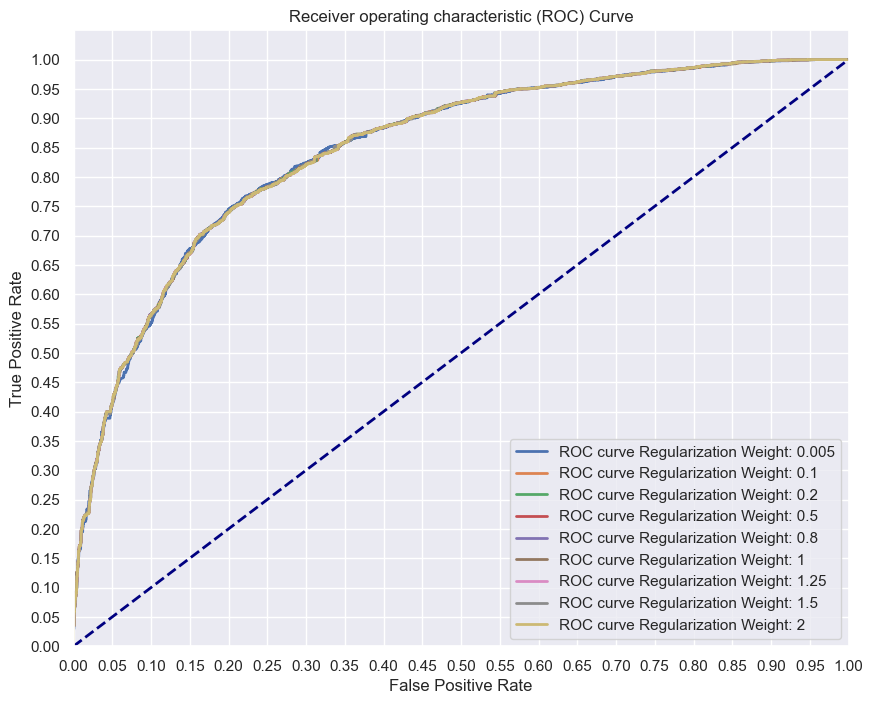

In [35]:

from sklearn.metrics import roc_curve, auc

C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]


plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    smote_model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(smote_model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)), '\n')
       
    lw = 2
    plt.plot(fpr, tpr,
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Since AUC score is very close for all weights, looks like weight 0.1 has best AUC score 0.8472. Lets build the final model 
Logistic Regression with weight 0.1.

AUC: 1.0


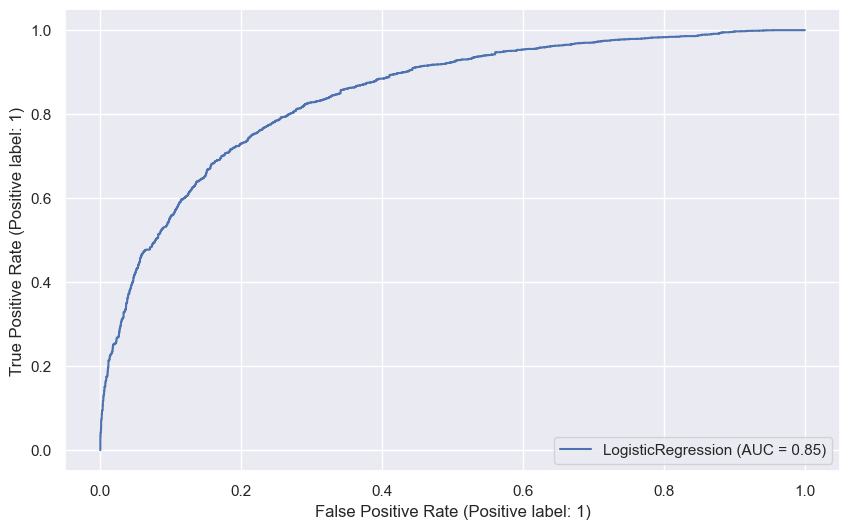

In [41]:
# Trying final model with c = 0.1
Final_logmodel = LogisticRegression(fit_intercept=False, C=0.1, solver='liblinear')
Final_logmodel.fit(X_train, y_train)

#Predict
y_pred = Final_logmodel.predict(X_test)
y_score = Final_logmodel.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_pred, y_score[:,1])
print('AUC:',auc(fpr, tpr))

from sklearn.metrics import roc_curve,RocCurveDisplay
RocCurveDisplay.from_estimator(Final_logmodel, X_test, y_test);      
